In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
tf1 = pd.read_csv('../TestResults/Test_Baseline_1000_1000.csv')
tf2 = pd.read_csv('../TestResults/Test_Baseline_1000_40_1000.csv')


In [4]:
def renameCat(res):
    res={key.split('_')[0]:val for key,val in res.items()}
    return res

In [7]:
#False Positive testing
#bloomfilter
def calcHitpercentage(algo,tf):
    bloom1 = tf.loc[tf['Algorithm']==algo]
    categories=list(bloom1)[4:]
    bloom1_cate=bloom1[categories]
    bloom1['Max'] = bloom1_cate.idxmax(axis=1)
    bloom1_res={}
    for cat in categories:
        bloom1_res[cat]=0
    for index,rows in bloom1[['originalCategory','Max']].iterrows():
        if rows['originalCategory'] not in bloom1_res:
            bloom1_res[rows['originalCategory']]=0
        if rows['originalCategory']== rows['Max']:
            bloom1_res[rows['originalCategory']]+=1
    print(len(list(bloom1_res.keys())))
    #bloom1_res1={key: (val/len(bloom1.loc[bloom1['originalCategory']==key])) for key, val in bloom1_res.items() if val >0}
    for key,val in bloom1_res.items():
        if val >0:
            bloom1_res[key]=val/len(bloom1.loc[bloom1['originalCategory']==key])
    return bloom1_res
lsi=renameCat(calcHitpercentage('LSI',tf1))
bf=renameCat(calcHitpercentage('bloomfilter',tf2))


27
27


In [6]:
def calcRangeHit(algo,tf):
    a = tf.loc[tf['Algorithm']==algo]
    categories=list(a)[4:]
    a_cate=a[categories]
    a['Max'] = a_cate.idxmax(axis=1)
    a_res={}
    for cat in categories:
        a_res[cat]=0
    for index,rows in a.iterrows():
        max_val=rows[rows['Max']]
        th_val=max_val*0.8
        test = [col for col,val in rows[categories].iteritems() if val>=th_val]
        #print(rows['originalCategory'],test)
        if rows['originalCategory'] not in a_res:
            a_res[rows['originalCategory']]=0
        if rows['originalCategory'] in test:
            a_res[rows['originalCategory']]+=1
    for key,val in a_res.items():
        if val >0:
            a_res[key]=val/len(a.loc[a['originalCategory']==key])
    return a_res

In [11]:
lsi_rh = renameCat(calcRangeHit('LSI',tf1))
bf_rh = renameCat(calcRangeHit('bloomfilter',tf2))

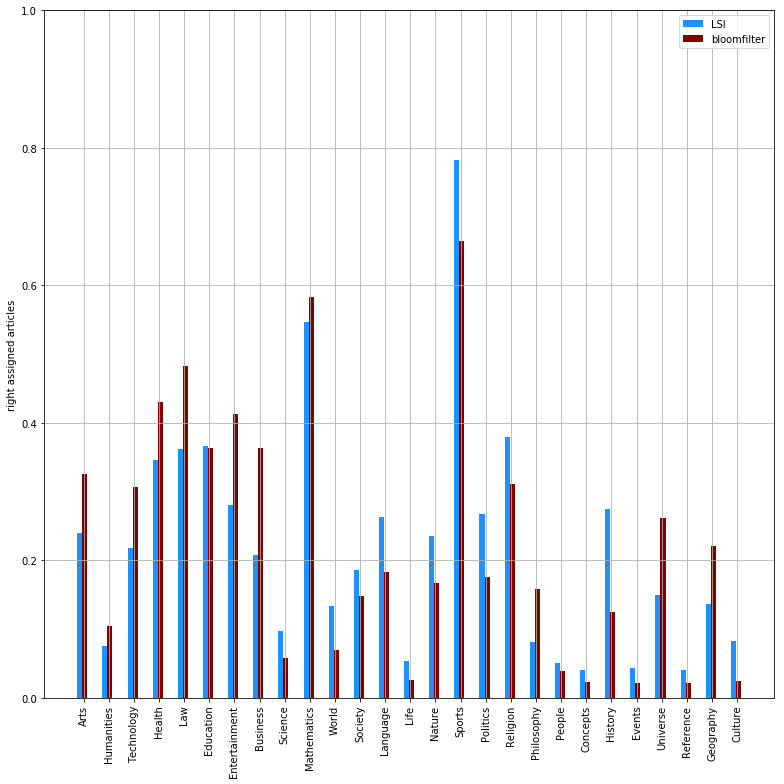

In [21]:
ind = np.arange(len(lsi))    # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(11,11))



p1 = ax.bar(ind-width*0.5,list(lsi.values()),width, align='center',color='dodgerblue')
p2 = ax.bar(ind+width*0.5,list(bf.values()),width, align='center',color='maroon')





ax.set_xticks(ind + width / 4)
ax.set_xticklabels(list(lsi.keys()),rotation='vertical')
ax.legend((p1[0], p2[0]), ('LSI', 'bloomfilter'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/accuracy_LSI_BF.png',dpi=500)
plt.show()

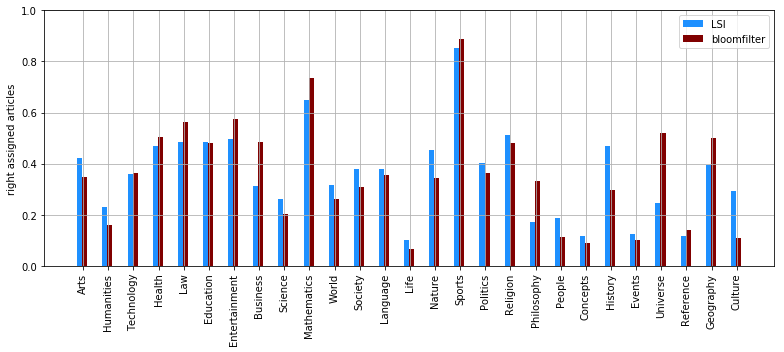

In [23]:
ind = np.arange(len(lsi_rh))    # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(11,5))



p1 = ax.bar(ind-width*0.5,list(lsi_rh.values()),width, align='center',color='dodgerblue')
p2 = ax.bar(ind+width*0.5,list(bf_rh.values()),width, align='center',color='maroon')





ax.set_xticks(ind + width / 6)
ax.set_xticklabels(list(lsi_rh.keys()),rotation='vertical')
ax.legend((p1[0], p2[0]), ('LSI', 'bloomfilter'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/accuracy_LSI_BF_range.png',dpi=500)
plt.show()

In [24]:

res_acc = np.array([[val for key,val in lsi.items()],[val for key,val in bf.items()]])
print(res_acc.mean(axis=1))     # to take the mean of each col
print(res_acc.std(axis=1))     # to take the std of

list(res_acc.std(axis=1))

[0.21997252 0.22483021]
[0.16816825 0.17860296]


[0.16816824764358093, 0.17860296362378378]

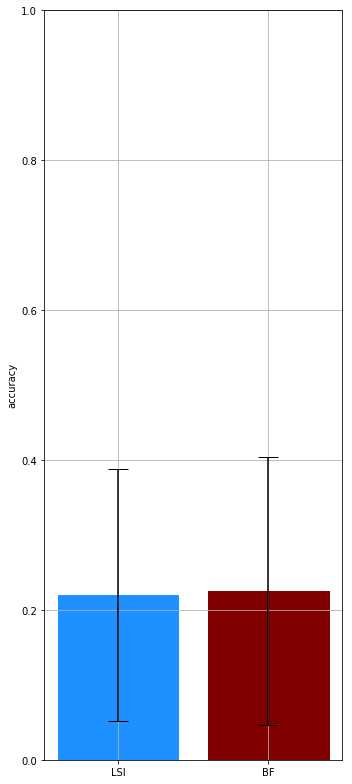

In [25]:
ind = np.arange(2)    # the x locations for the groups
width = 0.2         # the width of the bars

fig, ax = plt.subplots(figsize=(5,11))


p1 = ax.bar(ind,list(res_acc.mean(axis=1)),yerr=list(res_acc.std(axis=1)), align='center',ecolor='black',capsize=10)
#ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
p1[0].set_color('dodgerblue')
p1[1].set_color('maroon')

ax.set_xticks(ind)
ax.set_xticklabels(['LSI','BF'],rotation='horizontal')
#ax.legend((p1[0], p2[0], p3[0],p4[0]), ('bloomfilter_50_20%', 'bloomfilter_50_40%','bloomfilter_50_70%','bloomfilter_50_100%'))
ax.set_ylim([0,1])
ax.set_ylabel('accuracy')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/hitaccuracy_LSI_BF.png',dpi=500)

plt.show()